# Machine Learning Intern Project

Submitted By----   Datta Sai Raipally

Step:1--Import the dataset and the necessary libraries, check datatype, statistical summary,shape, null values etc.

In [128]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import math
from datetime import date
import calendar 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,log_loss,jaccard_score
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [129]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [130]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [131]:
#Datatypes
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [132]:
# Statistical Summary
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [133]:
# Shape of the dataset
df.shape

(11914, 16)

In [134]:
# Number of Null values that a column contains in the dataset
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Step 2 -- 
From the above output we can see that "Market Category" has more number of null vlues so we will drop the "Market Category" column and in addition to that we are going to drop some other columns which does not affect the car price and are less relevance.
Car Price does not depend on how popular it is, type of engine fuel used and on the number of doors it has. So here we are dropping "Popular", "Engine Fuel Type" and "Number of Doors" column.

In [135]:
#Droppping the columns
df=df.drop(['Market Category','Popularity','Engine Fuel Type','Number of Doors'],axis=1)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


In [136]:
df.shape

(11914, 12)

Step 3-- Renaming the columns
**"Engine HP" to "HP"**, **"Engine Cylinders" to "Cylinders"**, **"Transmission**
**Type" to "Transmission"**, **"Driven_Wheels" to "Drive Mode"**,**"highway MPG" to "MPG-H"**, **"city**
**mpg" to "MPG-C"** and, **"MSRP" to "Price"**


In [137]:
#Renaming the columns
df.rename(columns = { "Engine HP": "HP", "Engine Cylinders": "Cylinders","Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H","city mpg": "MPG-C", "MSRP": "Price"}, inplace = True) 
df.columns

Index(['Make', 'Model', 'Year', 'HP', 'Cylinders', 'Transmission',
       'Drive Mode', 'Vehicle Size', 'Vehicle Style', 'MPG-H', 'MPG-C',
       'Price'],
      dtype='object')

Step 4--Check for any duplicates in the data, check for null values and missing data and remove them.

In [138]:
#Dropping the duplicate values
df1=df.drop_duplicates()
df1.shape

(11122, 12)

In [139]:
#Null Values
df1.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Price             0
dtype: int64

In [140]:
#Dropping null values
df2=df1.dropna()
df2.shape

(11024, 12)

Step 5-- Plot graphs of various columns to check for outliers and remove those data points from the dataset.

In [141]:
#Plot boxplot on columns to know the outliers
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11024 entries, 0 to 11913
Data columns (total 12 columns):
Make             11024 non-null object
Model            11024 non-null object
Year             11024 non-null int64
HP               11024 non-null float64
Cylinders        11024 non-null float64
Transmission     11024 non-null object
Drive Mode       11024 non-null object
Vehicle Size     11024 non-null object
Vehicle Style    11024 non-null object
MPG-H            11024 non-null int64
MPG-C            11024 non-null int64
Price            11024 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


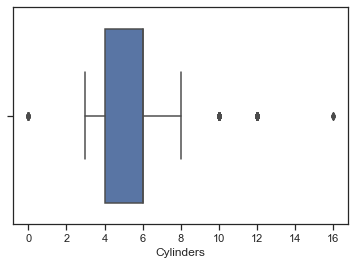

In [142]:
sns.boxplot(x=df2['Cylinders'])

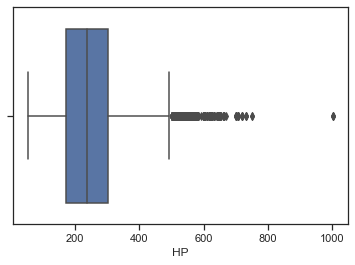

In [143]:
sns.boxplot(x=df2['HP'])

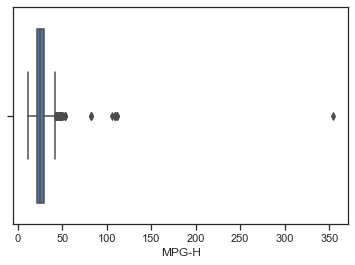

In [144]:
sns.boxplot(x=df2['MPG-H'])

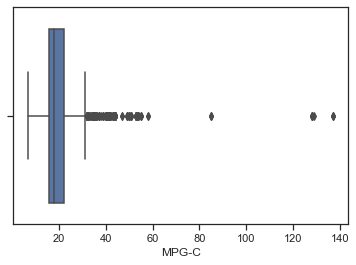

In [145]:
sns.boxplot(x=df2['MPG-C'])

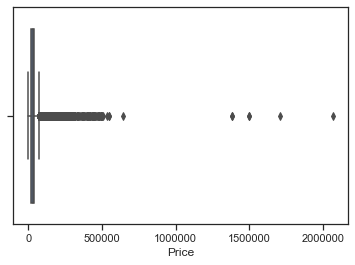

In [146]:
sns.boxplot(x=df2['Price'])

In [147]:
#Removing Outlier
q1=df2.quantile(0.25)
q3=df2.quantile(0.75)
iqr=q3-q1
iqr

Year             9.00
HP             131.00
Cylinders        2.00
MPG-H            8.00
MPG-C            6.00
Price        21426.25
dtype: float64

In [148]:
new_df=df2[~((df2<(q1-1.5*iqr))|(df2>(q3+1.5*iqr))).any(axis=1)]

new_df.shape

(9307, 12)

Step 6-- plotting the top popular car brands. The average price among the top car brands is represented below.

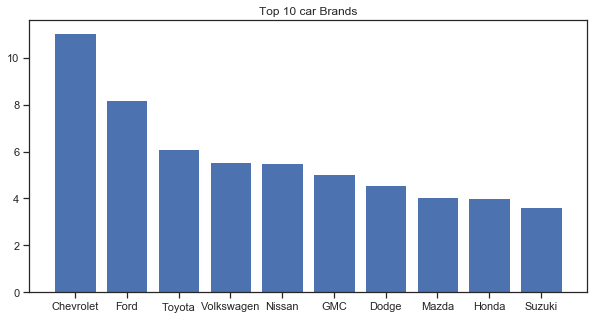

In [149]:
#Percentage of car per brand
counts=new_df['Make'].value_counts()*100/sum(new_df['Make'].value_counts())

#Top 10 popular brands
popularCars=counts.index[:10]

#Plotting the bar plot
plt.figure(figsize=(10,5))
plt.bar(popularCars,height=counts[:10])
plt.title('Top 10 car Brands')
plt.show()

In [150]:
AvgPrice=new_df[['Make','Price']].loc[(new_df['Make']=='Chevrolet')|
                                     (new_df['Make']=='Ford')|
                                     (new_df['Make']=='Toyota')|
                                     (new_df['Make']=='Volkswagen')|
                                     (new_df['Make']=='Nissan')|
                                     (new_df['Make']=='GMC')|
                                     (new_df['Make']=='Dodge')|
                                     (new_df['Make']=='Mazda')|
                                     (new_df['Make']=='Honda')|
                                     (new_df['Make']=='Suzuki')].groupby('Make').mean()
AvgPrice

,Price
Make,
Chevrolet,28142.855891
Dodge,26076.722353
Ford,28326.220762
GMC,33261.400853
Honda,27381.364611
Mazda,20495.820106
Nissan,28352.543860
Suzuki,18168.241888
Toyota,27769.421793


Step 7-- correlation matrix is shown below

In [151]:
#Correlation Matrix
new_df_corr=new_df.corr()
new_df_corr

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.338170,-0.124527,0.369743,0.331108,0.606502
HP,0.338170,1.000000,0.713408,-0.443473,-0.543048,0.740669
Cylinders,-0.124527,0.713408,1.000000,-0.703194,-0.754693,0.353675
MPG-H,0.369743,-0.443473,-0.703194,1.000000,0.939192,-0.105358
MPG-C,0.331108,-0.543048,-0.754693,0.939192,1.000000,-0.177728
Price,0.606502,0.740669,0.353675,-0.105358,-0.177728,1.000000


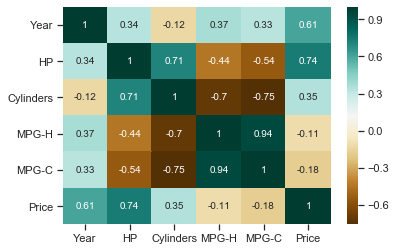

In [152]:
sns.heatmap(new_df_corr,annot=True,linecolor='blue',cmap='BrBG')

Documentation of insights (Using heatmap plotted)

We conclude that HP and Cylinders both are correlated positively with each other                                                    
Price is correlated with Year and HP positively                                                                                     
MPG-C and MPG-H both have very less correlation in each other                                                                      
MPG-C and MPG-H both have strong negitive correlation with Cylinders

Step 8-- Exploratory Data Analysis and different graphs

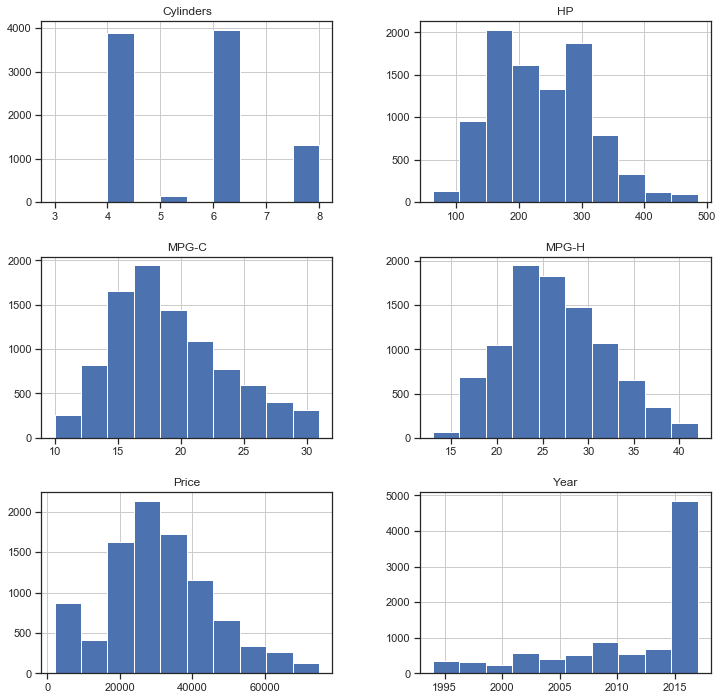

In [153]:
#Exploratory Data Analysis
new_df.hist(figsize=(12,12))
plt.show()

<Figure size 1800x1440 with 0 Axes>

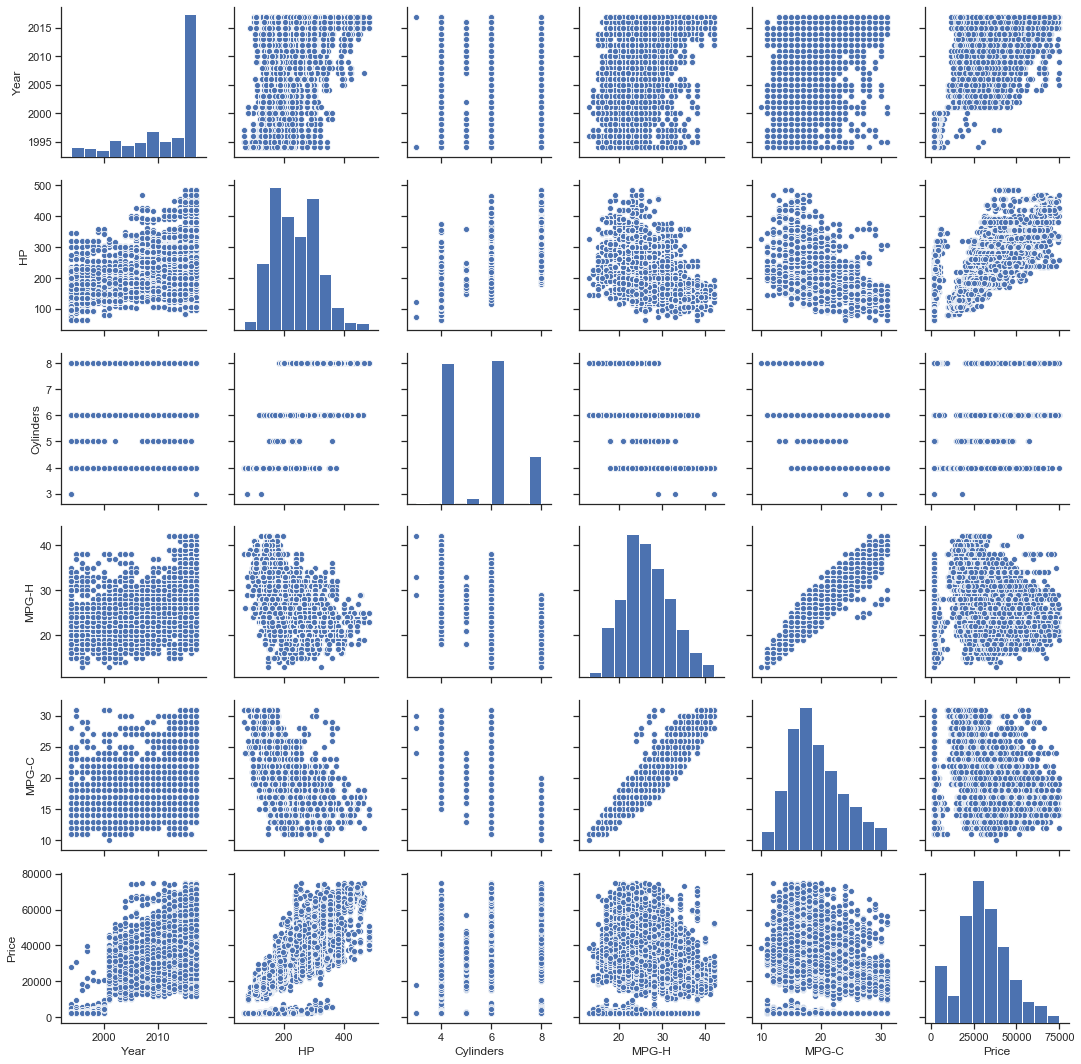

<Figure size 1800x1440 with 0 Axes>

In [154]:
#Pair Plot
sns.set(style="ticks", color_codes=True)
sns.pairplot(new_df)
plt.figure(figsize=(25,20))

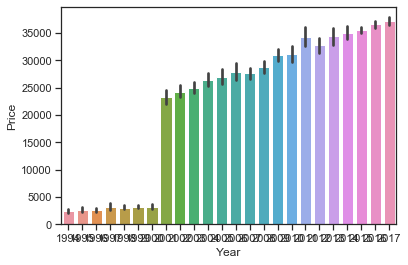

In [155]:
sns.barplot(new_df['Year'],new_df['Price'])

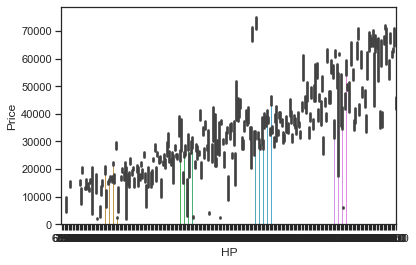

In [156]:
sns.barplot(new_df['HP'],new_df['Price'])

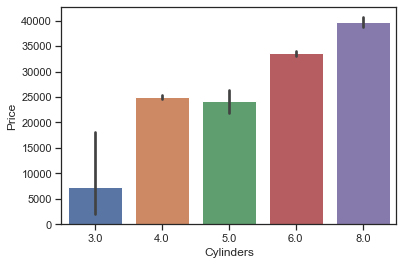

In [157]:
sns.barplot(new_df['Cylinders'],new_df['Price'])

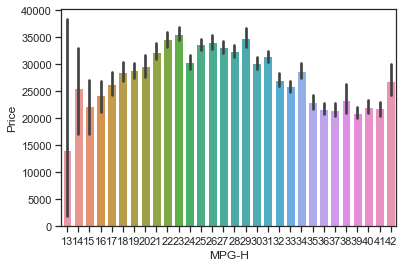

In [158]:
sns.barplot(new_df['MPG-H'],new_df['Price'])

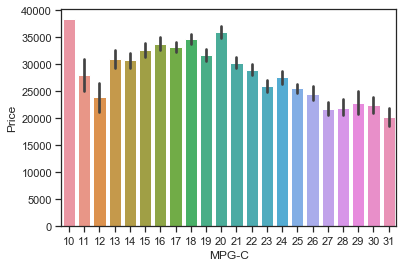

In [159]:
sns.barplot(new_df['MPG-C'],new_df['Price'])

Conclusion after plotting different graphs

-After plotting graph between Year and Price we conclude that as Year increase Price also increase                                                   
-As value of HP increase Price will also increase                                                                                           
-As value of Cylinders increase Price will also increase                                                                                  
-Price will decrease with the value of MPG-H and MPG-C

In [160]:
x=new_df[[ 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y=new_df['Price'].values
x,y

(array([[2011.,  335.,    6.,   26.,   19.],
        [2011.,  300.,    6.,   28.,   19.],
        [2011.,  300.,    6.,   28.,   20.],
        ...,
        [2012.,  300.,    6.,   23.,   16.],
        [2013.,  300.,    6.,   23.,   16.],
        [2006.,  221.,    6.,   26.,   17.]]),
 array([46135, 40650, 36350, ..., 50620, 50920, 28995], dtype=int64))

In [161]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1,1))
x,y

(array([[-0.03068714,  1.29014638,  0.41293346, -0.07835264, -0.06015565],
        [-0.03068714,  0.83543115,  0.41293346,  0.27156483, -0.06015565],
        [-0.03068714,  0.83543115,  0.41293346,  0.27156483,  0.16882948],
        ...,
        [ 0.12572316,  0.83543115,  0.41293346, -0.60322883, -0.74711105],
        [ 0.28213345,  0.83543115,  0.41293346, -0.60322883, -0.74711105],
        [-0.81273862, -0.1909261 ,  0.41293346, -0.07835264, -0.51812592]]),
 array([[ 1.0220615 ],
        [ 0.65912126],
        [ 0.37459199],
        ...,
        [ 1.31883215],
        [ 1.33868303],
        [-0.1120854 ]]))

Step 9-- splitting dataset into 80 and 20 ratio And built a linear regression machine learning model with Price as the target variable.

In [228]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train,x_test,y_train,y_test

(array([[ 0.75136435,  0.05591932, -1.02969857,  1.32131722,  0.85578488],
        [-0.81273862, -0.51572269,  0.41293346, -0.95314629, -0.97609618],
        [ 0.59495405, -0.3338366 , -1.02969857,  0.79644102,  0.85578488],
        ...,
        [-0.03068714, -0.72359252, -1.02969857,  0.79644102,  0.85578488],
        [ 0.28213345,  1.16022774,  0.41293346, -0.25331137, -0.51812592],
        [ 0.75136435,  0.7444881 ,  0.41293346, -0.25331137, -0.28914078]]),
 array([[ 0.59495405,  2.34248735,  1.85556549, -0.60322883, -0.74711105],
        [ 0.75136435, -0.6586332 , -1.02969857,  0.44652356,  0.39781461],
        [-0.81273862, -0.45076337,  0.41293346, -0.95314629, -0.97609618],
        ...,
        [ 0.59495405,  0.64055319,  0.41293346, -0.77818756, -0.51812592],
        [ 0.43854375,  2.39445481,  1.85556549, -0.60322883, -0.74711105],
        [-1.12555922,  0.83543115,  1.85556549, -0.4282701 , -0.74711105]]),
 array([[ 0.72529086],
        [ 0.16946623],
        [ 0.21876258],
 

In [229]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

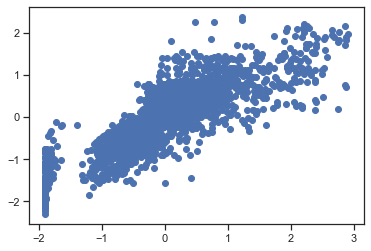

In [230]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)
plt.scatter(y_test,y_pred)

In [231]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.420646060768792
Root Mean Squared Error: 0.5455298387676427
R2 Score: 0.6929774600028582


Step 10--Try different algorithms and check their performance over metrics like R_square, RMSE, MAE.

1.polynomial regression

In [232]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

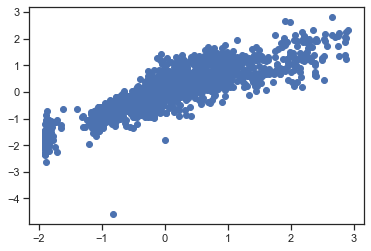

In [233]:
y_pred=lin_reg_2.predict(poly_reg.fit_transform(x_test))
plt.scatter(y_test,y_pred)

In [234]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.33851407099805486
Root Mean Squared Error: 0.4610408080685653
R2 Score: 0.780713459766525


2.Support Vector Machine

In [235]:
#Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

C:\Users\Datta Sai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Datta Sai\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

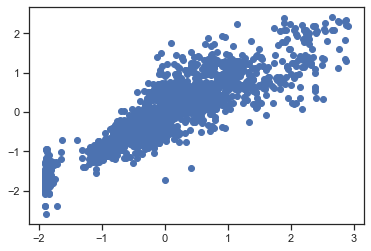

In [236]:
# Predicting a new result
y_pred = regressor.predict(x_test)
plt.scatter(y_test,y_pred)

In [237]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.31923645329838135
Root Mean Squared Error: 0.44904890646308715
R2 Score: 0.791972607111848


3.Random forest

In [238]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(x_train, y_train)

C:\Users\Datta Sai\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

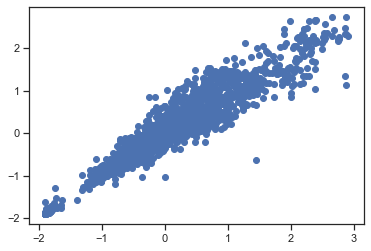

In [239]:
y_pred = regressor.predict(x_test)
plt.scatter(y_test,y_pred)

In [240]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.19959716092432123
Root Mean Squared Error: 0.28390631405779737
R2 Score: 0.9168459621788586


4.Decision Tree Regressor

In [241]:
from sklearn.tree import DecisionTreeRegressor
regr1=DecisionTreeRegressor(max_depth=4)
regr2=DecisionTreeRegressor(max_depth=5)
regr1.fit(x_train,y_train)
regr2.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

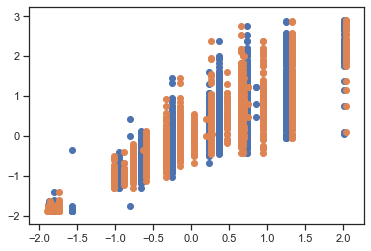

In [242]:
y_pred1=regr1.predict(x_test)
y_pred2=regr2.predict(x_test)
plt.scatter(y_pred1,y_test)
plt.scatter(y_pred2,y_test)

In [243]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('R2 Score:', metrics.r2_score(y_test, y_pred1))

Mean Absolute Error: 0.3320691749993348
Root Mean Squared Error: 0.4579727570643132
R2 Score: 0.7836222857241484


In [244]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('R2 Score:', metrics.r2_score(y_test, y_pred2))

Mean Absolute Error: 0.30638666603177317
Root Mean Squared Error: 0.430339797127833
R2 Score: 0.8089459441684647


Documentation of Findings:                                                                                                               
Random Forest Regressor had greater accuracy with R2_score of nearly 0.92                                                            
Then Decision Tree Regressor had an R2_score of 0.81                                                                                     
SVM had an R2_score of 0.79                                                                                                                         
Linear and Polynomial Regression are having 0.69 and 0.78 R2_score respectively.

Thank You